### 1. 환경 설정

##### ◾uv 패키지 설치
- Python 개발 환경에서 더욱 편리한 패키지 관리를 제공하는 도구로, 고속성, 크로스 플랫폼 지원, 전용 인터페이스 등 다양한 장점
- 특히, Rust로 구현되어 있어 매우 빠른 동작을 자랑
- 설치 명령어
  ```bash
  # On macOS and Linux.
  curl -LsSf https://astral.sh/uv/install.sh | sh

  # On Windows.
  powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"
  ```

##### ◾프로젝트 생성
```bash
# 'project-name'으로 프로젝트 생성
uv init [project-name]

# 의존성 추가 : MCP 의존성 추가
uv add "mcp[cli]"
--
# Specify a version constraint
uv add 'requests==2.31.0'

# Add a git dependency
uv add git+https://github.com/psf/requests
--
```

##### ◾MCP 실행
```bash
# uv를 사용해 server.py 클로드에 추가!
uv run mcp install server.py
```


- Test용 server.py

In [ ]:
# server.py
from mcp.server.fastmcp import FastMCP

# Create an MCP server
mcp = FastMCP("Demo")


# Add an addition tool
@mcp.tool()
def add(a: int, b: int) -> int:
    """Add two numbers"""
    return a + b


# Add a dynamic greeting resource
@mcp.resource("greeting://{name}")
def get_greeting(name: str) -> str:
    """Get a personalized greeting"""
    return f"Hello, {name}!"

- 명령어를 사용하여 클로드에 서버 등록!</br>
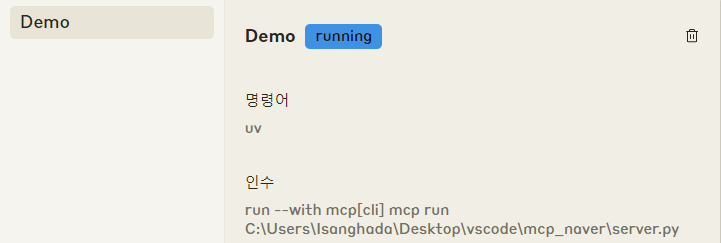
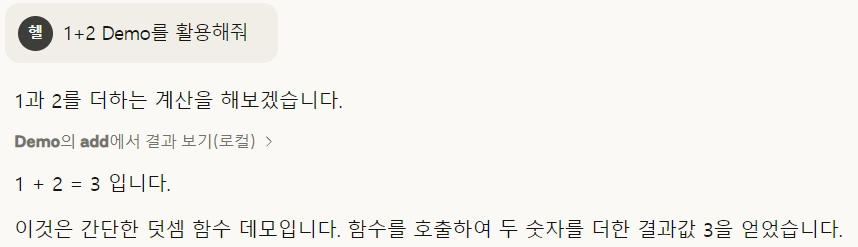

### 2. MCP 프로토콜